# FIGURE 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sp
import matplotlib.pyplot as plt
from msresist.pre_processing import preprocessing, MeanCenter, Log2T, MergeDfbyMean
from msresist.sequence_analysis import FormatName, pYmotifs
from msresist.figures.figure1 import plotClustergram, plotpca_explained, plotpca_ScoresLoadings_plotly, plotVarReplicates
import warnings
warnings.simplefilter("ignore")

In [2]:
pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
def MSaxl(file):
    b = MeanCenter(Log2T(file), mc_row=True, mc_col=False)
    longnames, shortnames = FormatName(b)
    b["Protein"] = longnames
    b = b.assign(Abbv=shortnames)
    merging_indices = list(b.columns[:3]) + ["Abbv"]
    b = pYmotifs(b, longnames)
    return b

### AXL Mutants BR1

In [4]:
lines = ["PC9", "KO", "KD", "KI", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]
b1 = pd.read_csv("./msresist/data/Raw/PC9_mutants_ActivatingAb_BR1_raw.csv")
b1.columns = list(b1.columns[:3]) + lines

b1 = MSaxl(b1).set_index(["Abbv", "Position"])

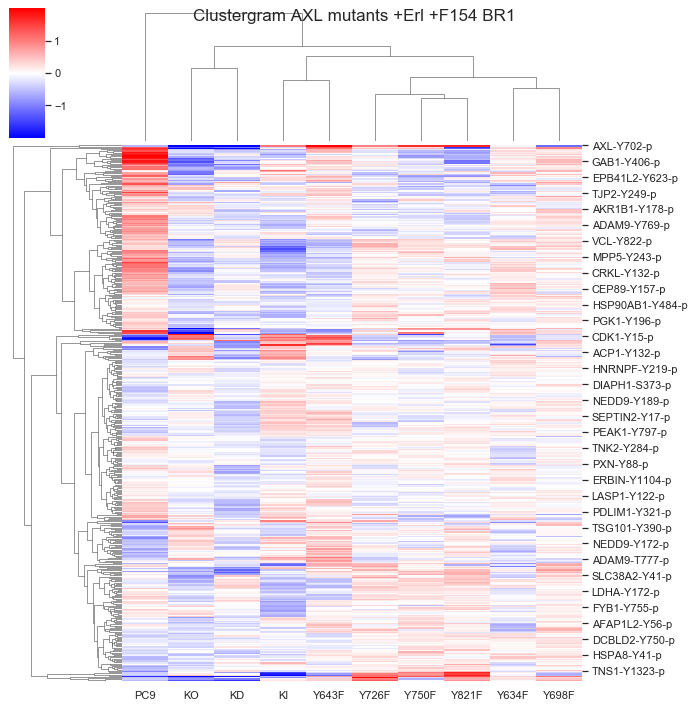

In [5]:
d1 = b1.select_dtypes(include=['float64'])
plotClustergram(d1, "Clustergram AXL mutants +Erl +F154 BR1",  max(np.max(np.abs(d1)) * 0.6))

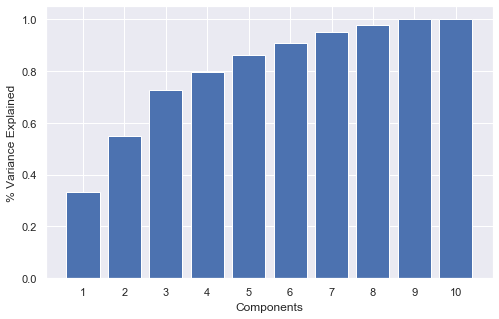

In [6]:
fig, ax = fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plotpca_explained(ax, d1, d1.shape[1])

               PC1       PC2
Position                    
Y759-p    0.021493  0.023525
Y702-p    0.171138  0.104745
Y702-p    0.047014  0.040872
Y866-p    0.116854  0.074906


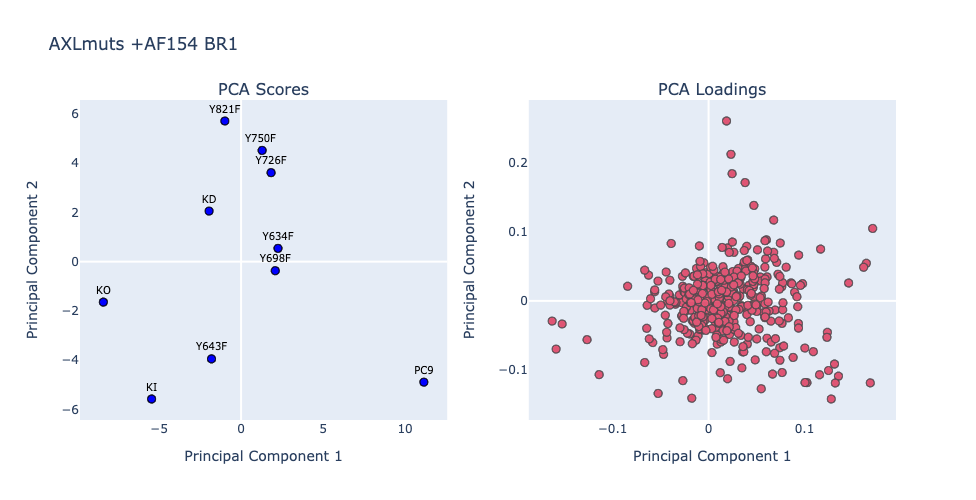

In [7]:
plotpca_ScoresLoadings_plotly(d1.T, "AXLmuts +AF154 BR1", "AXL")

### AXL Mutants BR2

In [11]:
b2 = pd.read_csv("./msresist/data/Raw/PC9_mutants_ActivatingAb_BR2_raw.csv")
b2.columns = list(b2.columns[:3]) + lines

b2 = MSaxl(b2).set_index(["Abbv", "Position"])

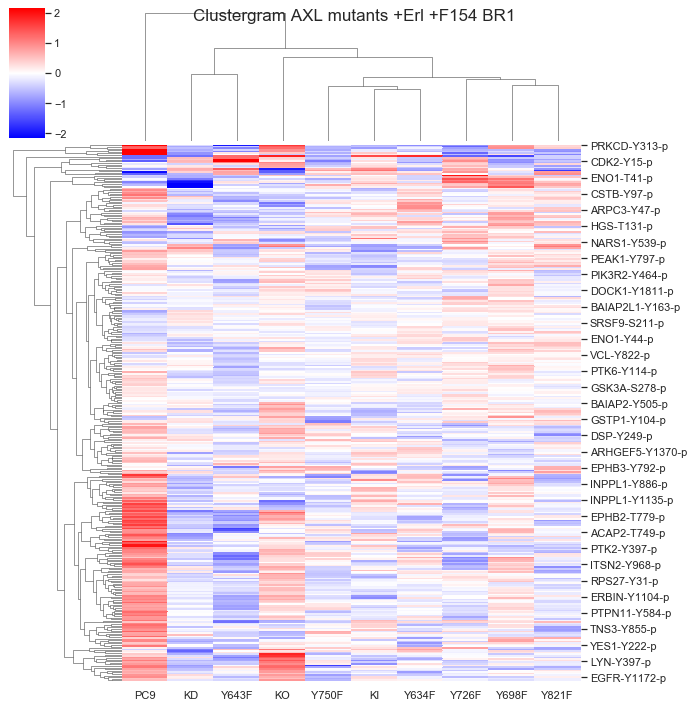

In [12]:
d2 = b2.select_dtypes(include=['float64'])
plotClustergram(d2, "Clustergram AXL mutants +Erl +F154 BR1",  max(np.max(np.abs(d2)) * 0.6))

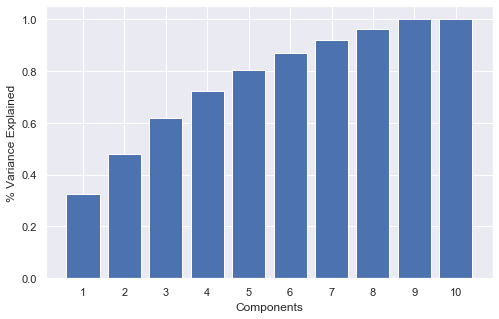

In [13]:
fig, ax = fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plotpca_explained(ax, d2, d2.shape[1])

               PC1       PC2
Position                    
Y481-p   -0.004206 -0.205147
Y866-p    0.017672 -0.218881


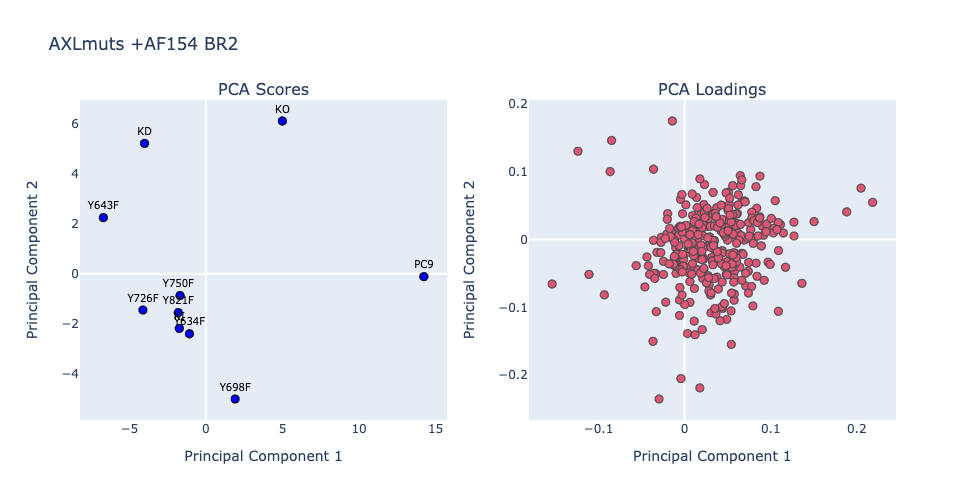

In [14]:
plotpca_ScoresLoadings_plotly(d2.T, "AXLmuts +AF154 BR2", "AXL")

### Merged

In [15]:
ABC_mutAF154 = preprocessing(Axlmuts_ErlF154=True, motifs=True, Vfilter=False, FCfilter=False, log2T=True, mc_row=True)
ABC_mutAF154.columns = list(ABC_mutAF154.columns[:5]) + ["PC9", "Knock-Out", "Kinase Dead", "Knock-In", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]

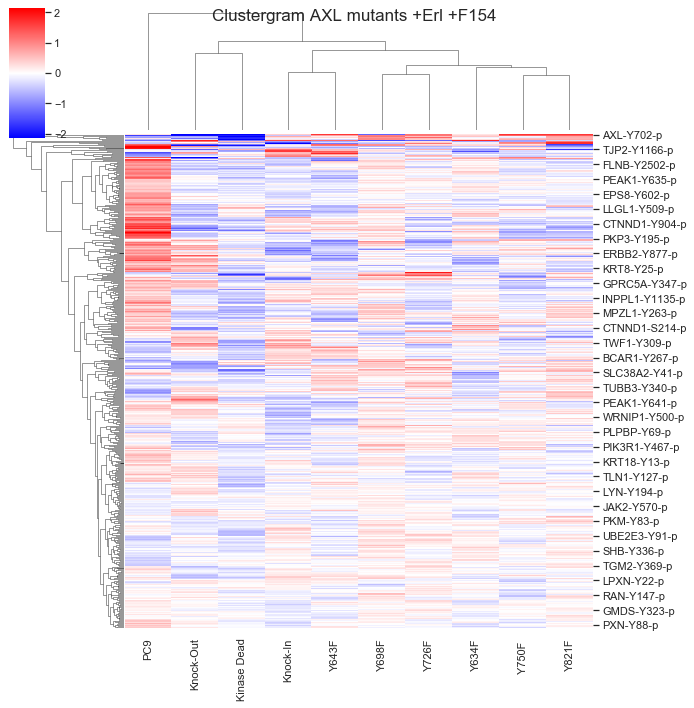

In [16]:
data_mutF154 = pd.concat([ABC_mutAF154.iloc[:, 3:5], ABC_mutAF154.iloc[:, 5:]], axis=1).set_index(["Abbv", "Position"])
plotClustergram(data_mutF154, "Clustergram AXL mutants +Erl +F154",  max(np.max(np.abs(data_mutF154)) * 0.6))

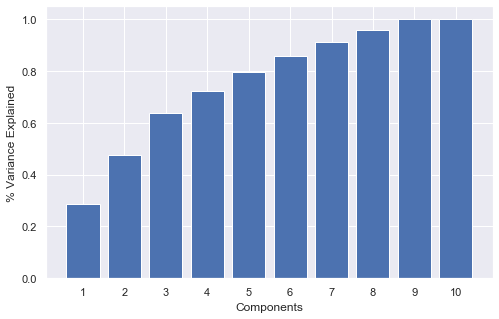

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plotpca_explained(ax, data_mutF154, data_mutF154.shape[1])

               PC1       PC2
Position                    
Y279-p   -0.103761  0.029837
S278-p    0.012006  0.000166


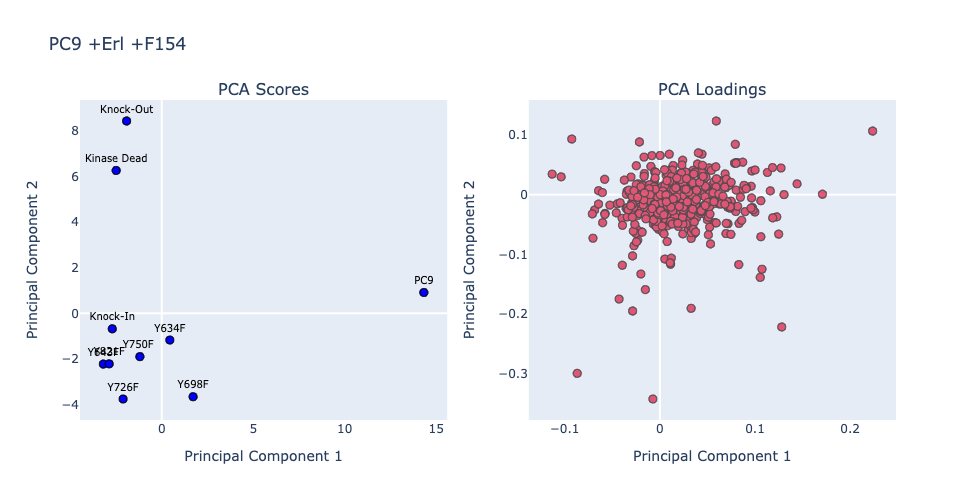

In [18]:
plotpca_ScoresLoadings_plotly(data_mutF154.T, "PC9 +Erl +F154", "GSK3A")

### Comparing Overlapping peptides across AXL mutant vs Bypass-treated PC9 Cells

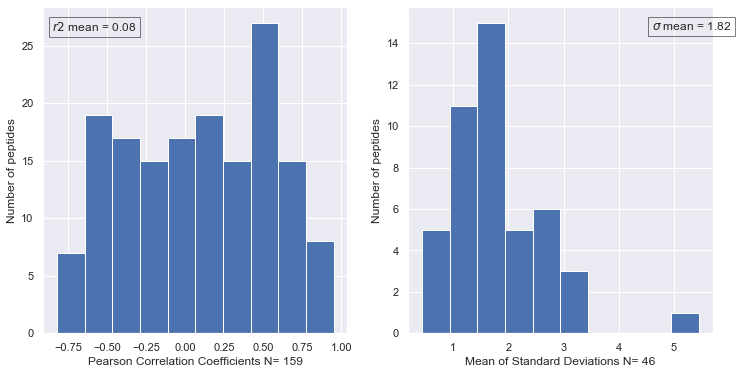

In [19]:
x = preprocessing(Axlmuts_ErlF154=True, rawdata=True)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
plotVarReplicates(ax, x)

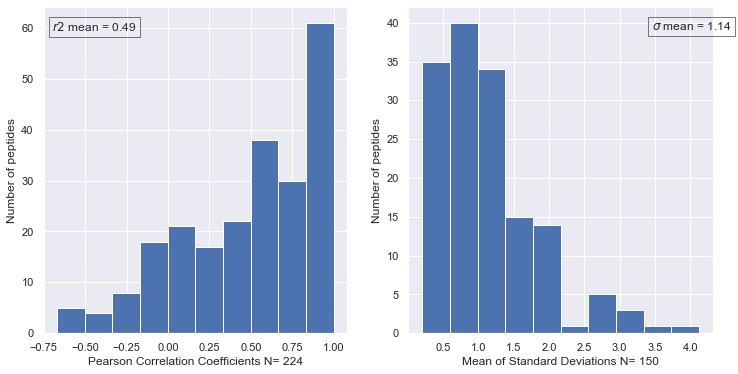

In [20]:
x = preprocessing(AXLwt=True, rawdata=True)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
plotVarReplicates(ax, x)

### Compare specific peptides in both replicates

In [21]:
from msresist.figures.figure3 import AXL, EGFR, adapters, ERK
import matplotlib.cm as cm


In [22]:
b1 = b1.reset_index().set_index(["Abbv"])
b2 = b2.reset_index().set_index(["Abbv"])

In [106]:
def plotProteinSites(ax, x, prot):
    peptides = pd.DataFrame(x.loc[prot])
    assert peptides.shape[0] > 0
    if peptides.shape[1] == 1:
        peptides = peptides.T
        d = peptides.iloc[:, 4:]
    else:
        d = peptides.select_dtypes(include=['float64'])

    positions = x.loc[prot]["Position"]
    
    colors_ = cm.rainbow(np.linspace(0, 1, peptides.shape[0]))
    for i in range(peptides.shape[0]):
        if peptides.shape[0] == 1:
            ax.plot(d.iloc[i, :], marker="o", label=positions, color = colors_[i])
        else:
            ax.plot(d.iloc[i, :], marker="o", label=positions[i], color = colors_[i])
    
    ax.legend(loc=0)
#     ax.set_ylabel("Normalized Signal", fontsize=10)

### AXL

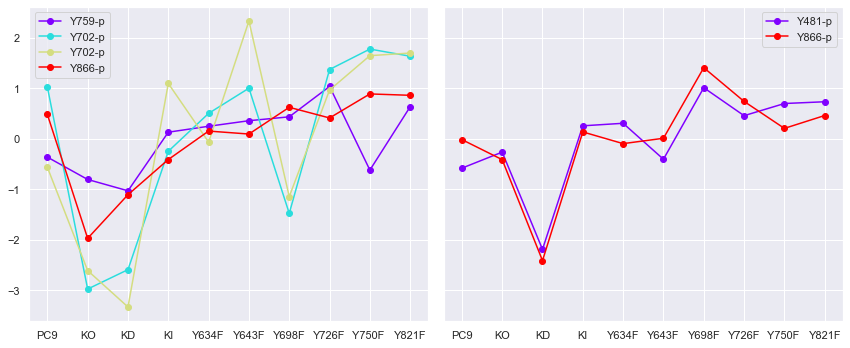

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True, )
plotProteinSites(ax[0], b1, "AXL")
plotProteinSites(ax[1], b2, "AXL")
plt.tight_layout()

### EGFR

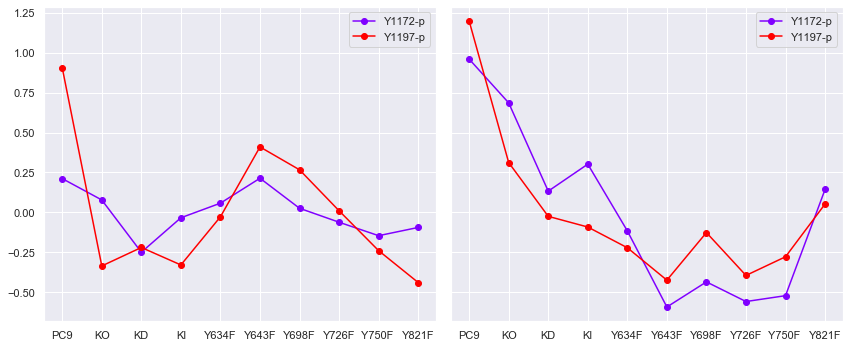

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plotProteinSites(ax[0], b1, "EGFR")
plotProteinSites(ax[1], b2, "EGFR")
plt.tight_layout()

### ERK3

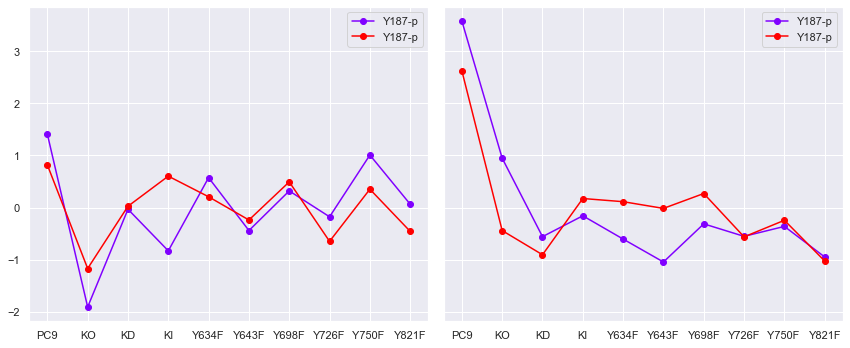

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plotProteinSites(ax[0], b1, "MAPK1")
plotProteinSites(ax[1], b2, "MAPK1")
plt.tight_layout()

### ERK1

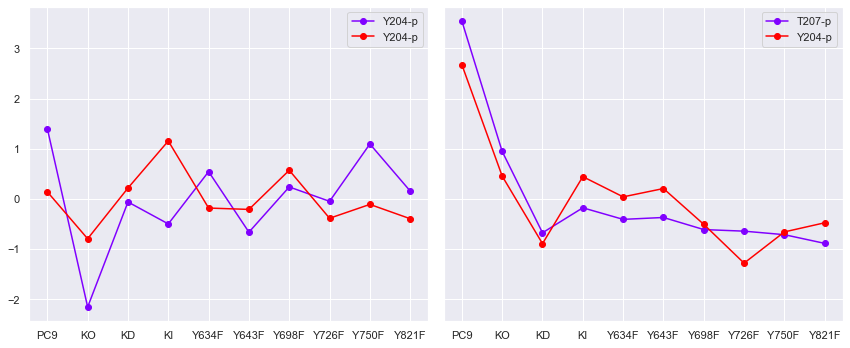

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plotProteinSites(ax[0], b1, "MAPK3")
plotProteinSites(ax[1], b2, "MAPK3")
plt.tight_layout()

### P38D

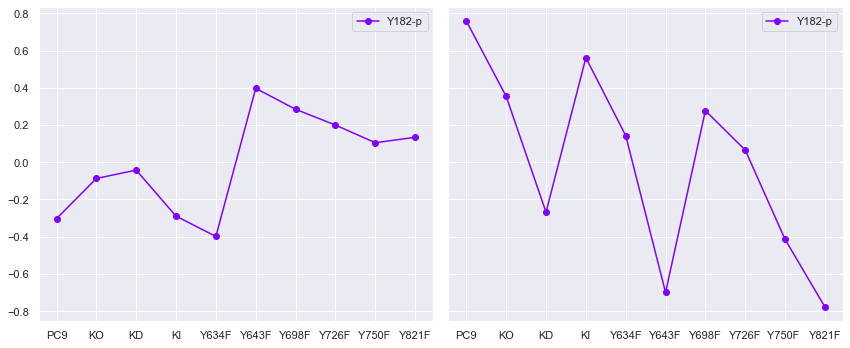

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plotProteinSites(ax[0], b1, "MAPK13")
plotProteinSites(ax[1], b2, "MAPK13")
plt.tight_layout()

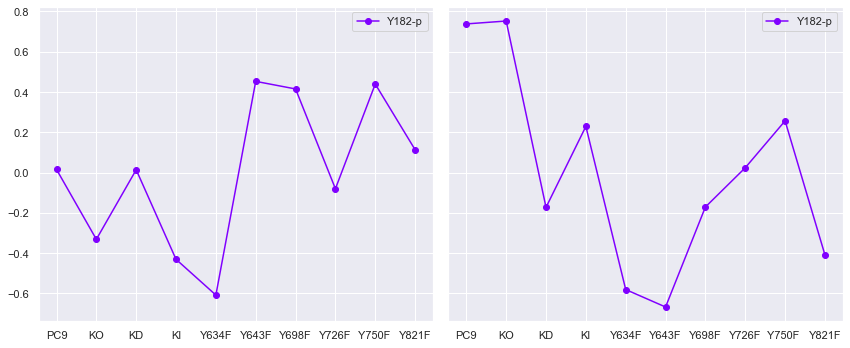

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plotProteinSites(ax[0], b1, "MAPK14")
plotProteinSites(ax[1], b2, "MAPK14")
plt.tight_layout()

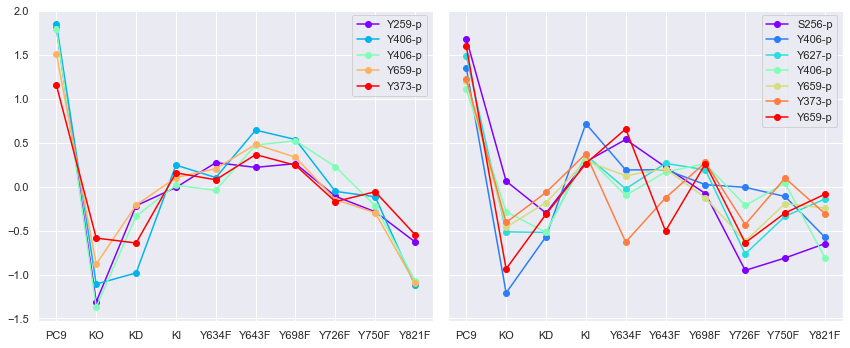

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plotProteinSites(ax[0], b1, "GAB1")
plotProteinSites(ax[1], b2, "GAB1")
plt.tight_layout()

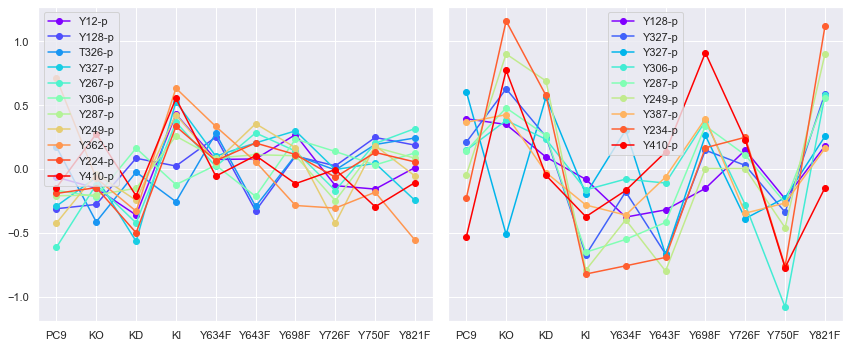

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plotProteinSites(ax[0], b1, "BCAR1")
plotProteinSites(ax[1], b2, "BCAR1")
plt.tight_layout()